In [1]:
import sys
# Hay que ejecutar esta línea antes de importar el módulo.
sys.path.append("C:/Users/poker/PycharmProjects/tgpy")
# Ahora se puede importar el módulo.
import tgpy as tg
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sb
%reload_ext tgpy

In [27]:
npriors = 3 # 1, 2, 3, 4
ngroups = 10 # any positive int
nparams = 300 # number of chains
nitersSGD = 300

# Create Priors

In [28]:
prior0 = tg.TgPrior('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=5, beta=5) # simetrico
prior1 = tg.TgPrior('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
prior2 = tg.TgPrior('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-10, high=1, alpha=2, beta=1) # masa a la derecha
prior3 = tg.TgPrior('prior3', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=0.5, beta=0.5) # doble masa

                    
if npriors == 1: 
    k = tg.DummyKernel(prior0)
elif npriors == 2:
    k = tg.DummyKernel(prior0, prior1)
elif npriors == 3:
    k = tg.DummyKernel(prior0, prior1, prior2) 
else:
    k = tg.DummyKernel(prior0, prior1, prior2, prior3) 


cov = tg.CovarianceTransport(k, noise=None)
tgp = tg.TGP([cov], dt=None, annealing=0)

tgp.sample_priors()

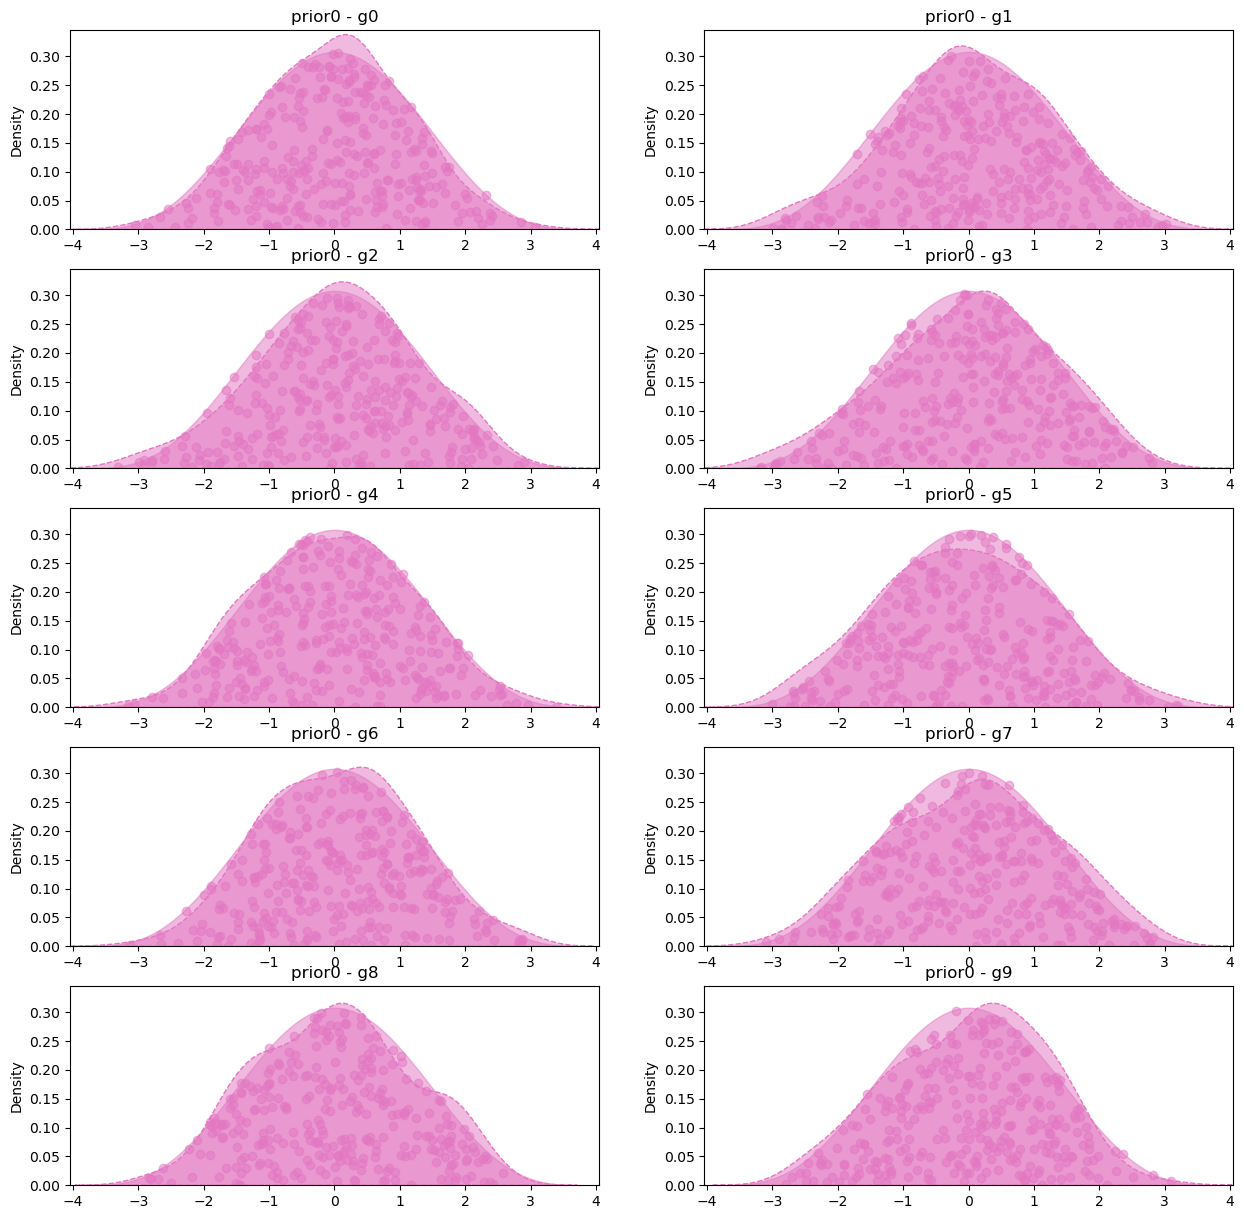

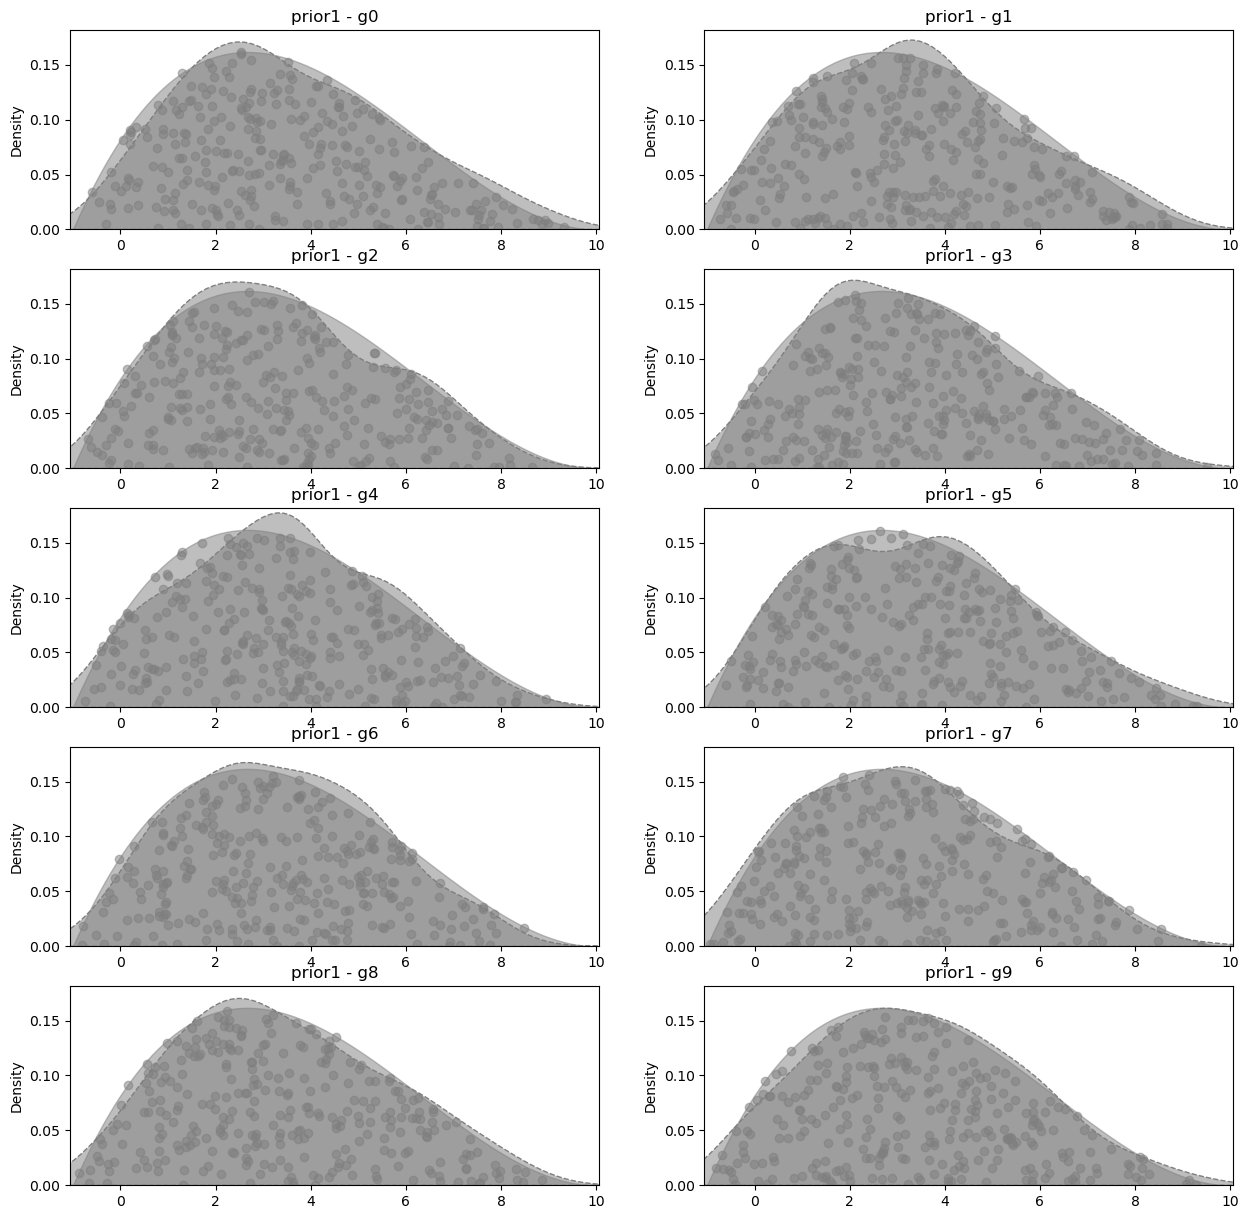

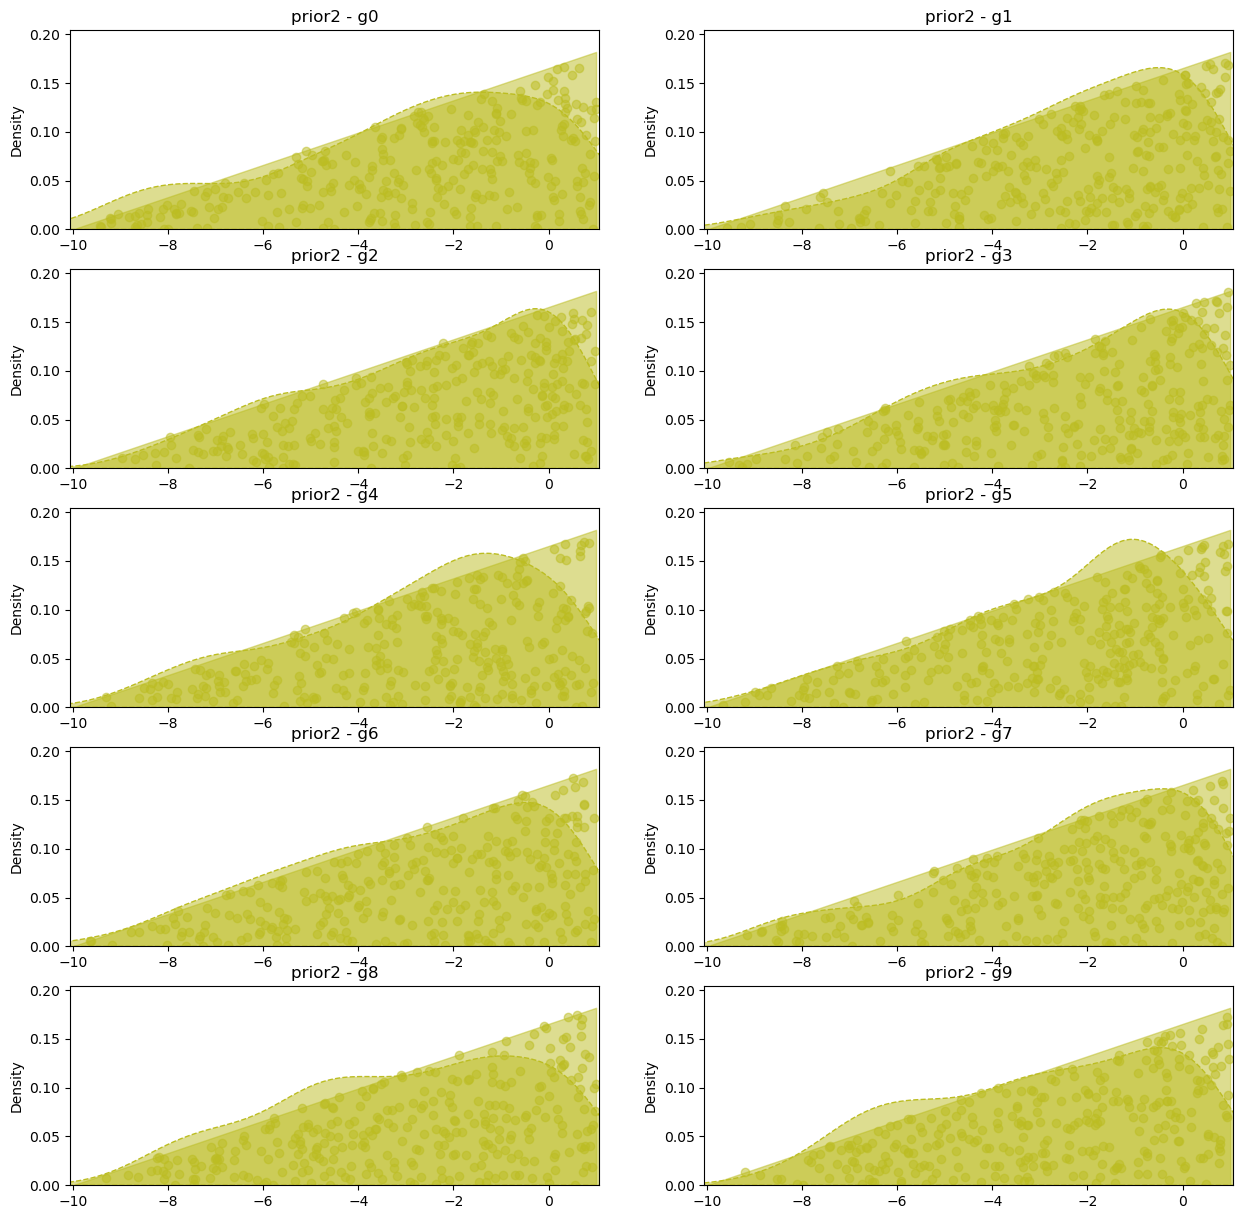

In [29]:
# Se guarda el sample de cada gruposample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)
sample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)
tgp.plot_priors()

# Punto inicial: SGD

  0%|                                                                                                         …

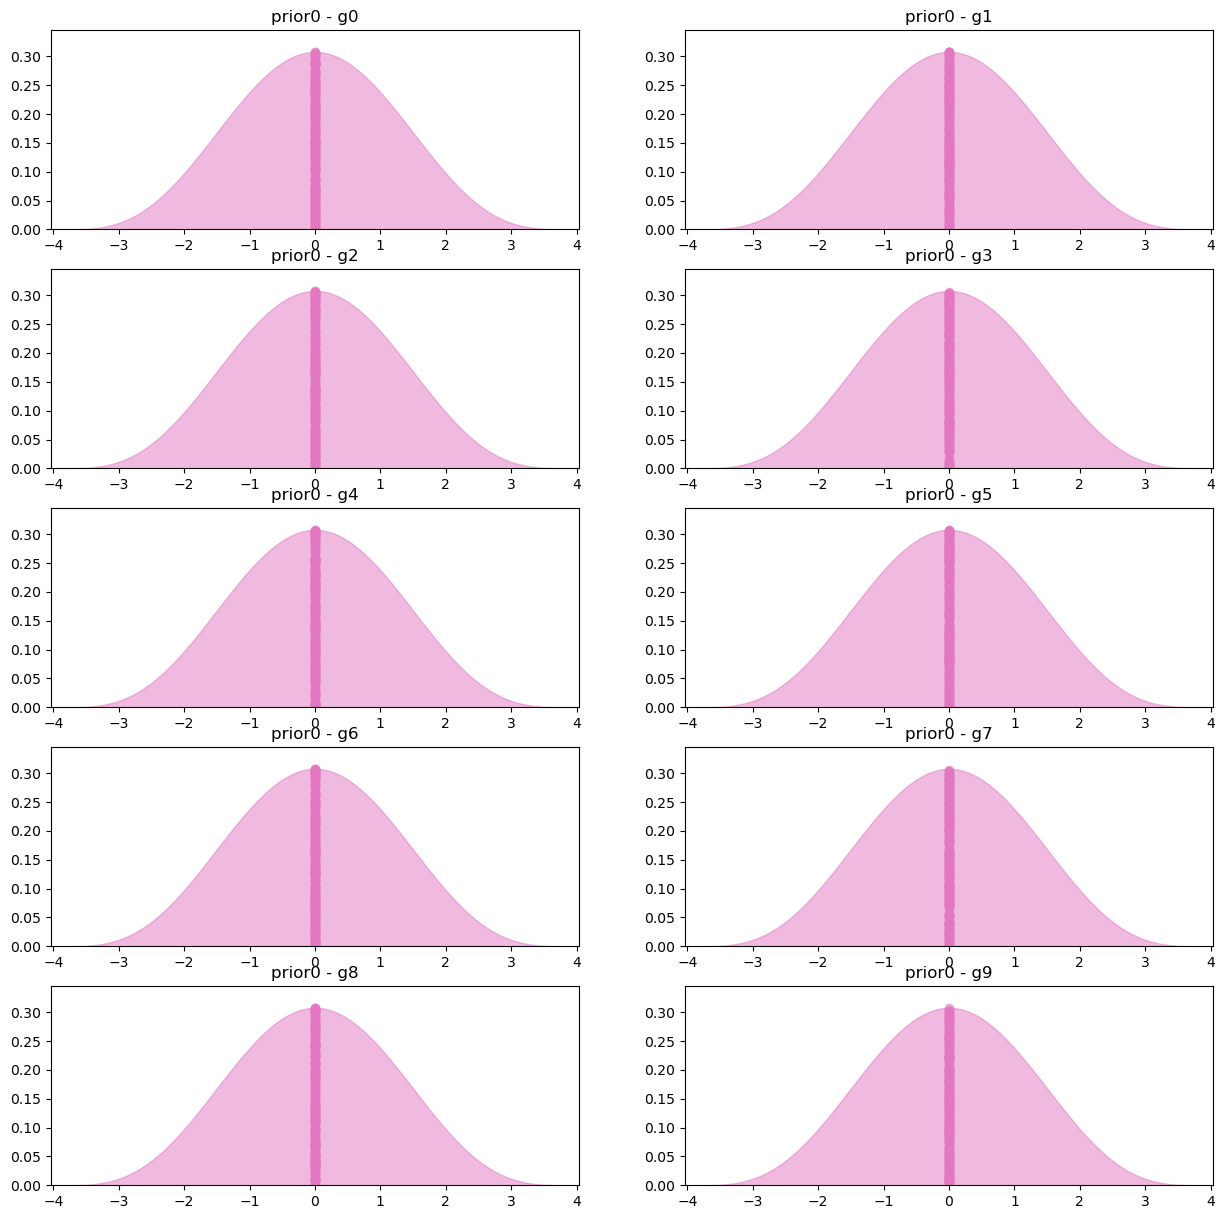

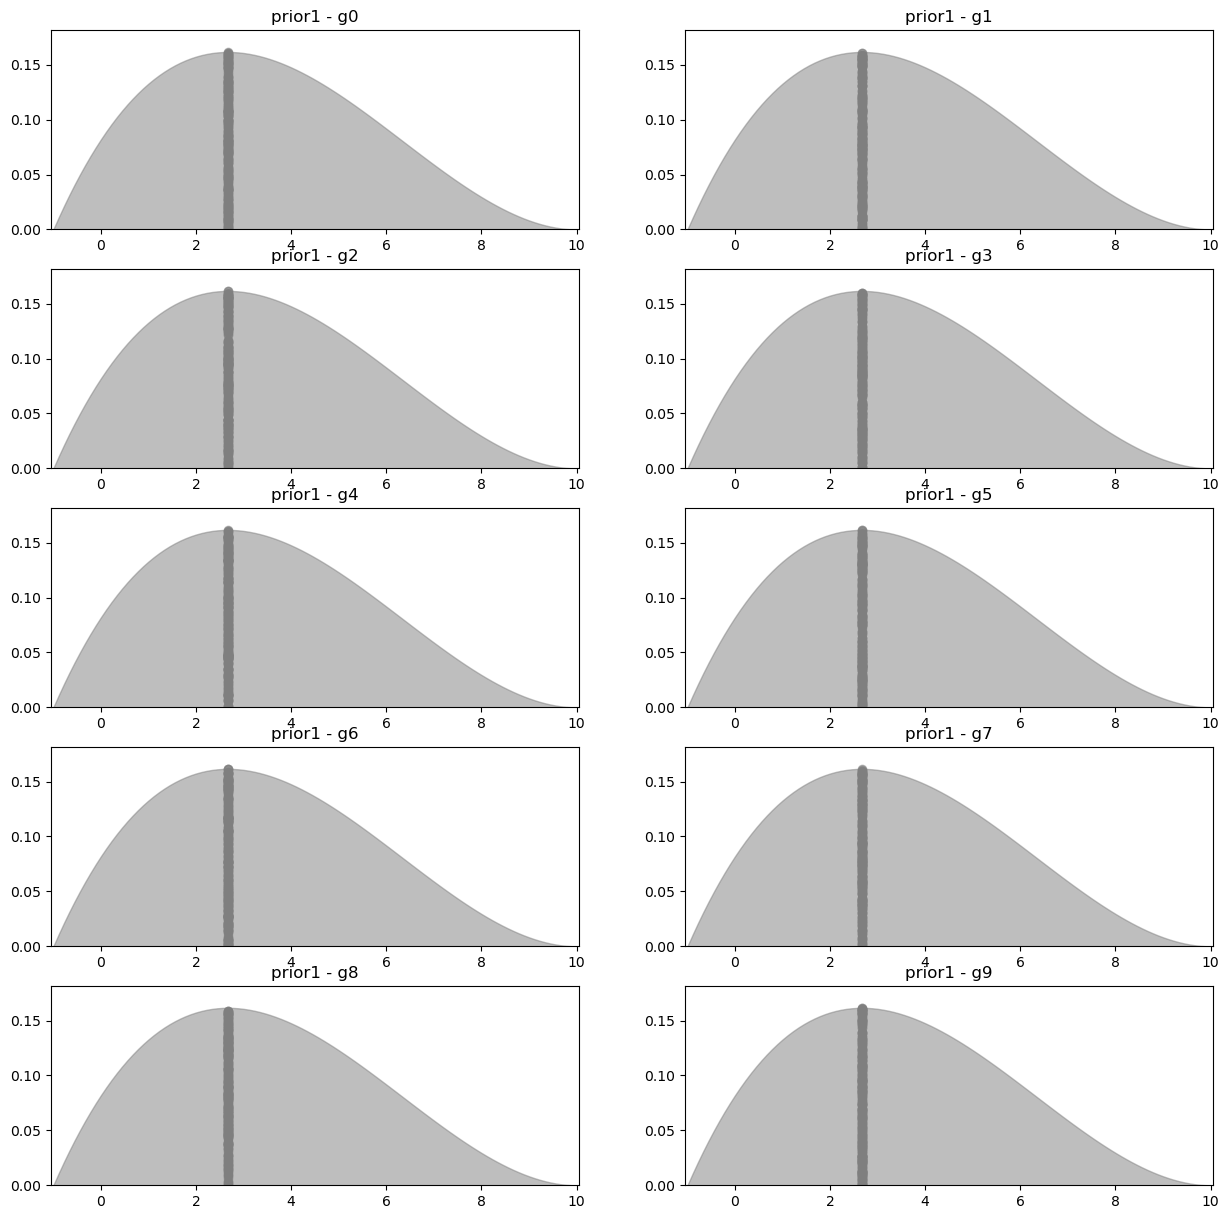

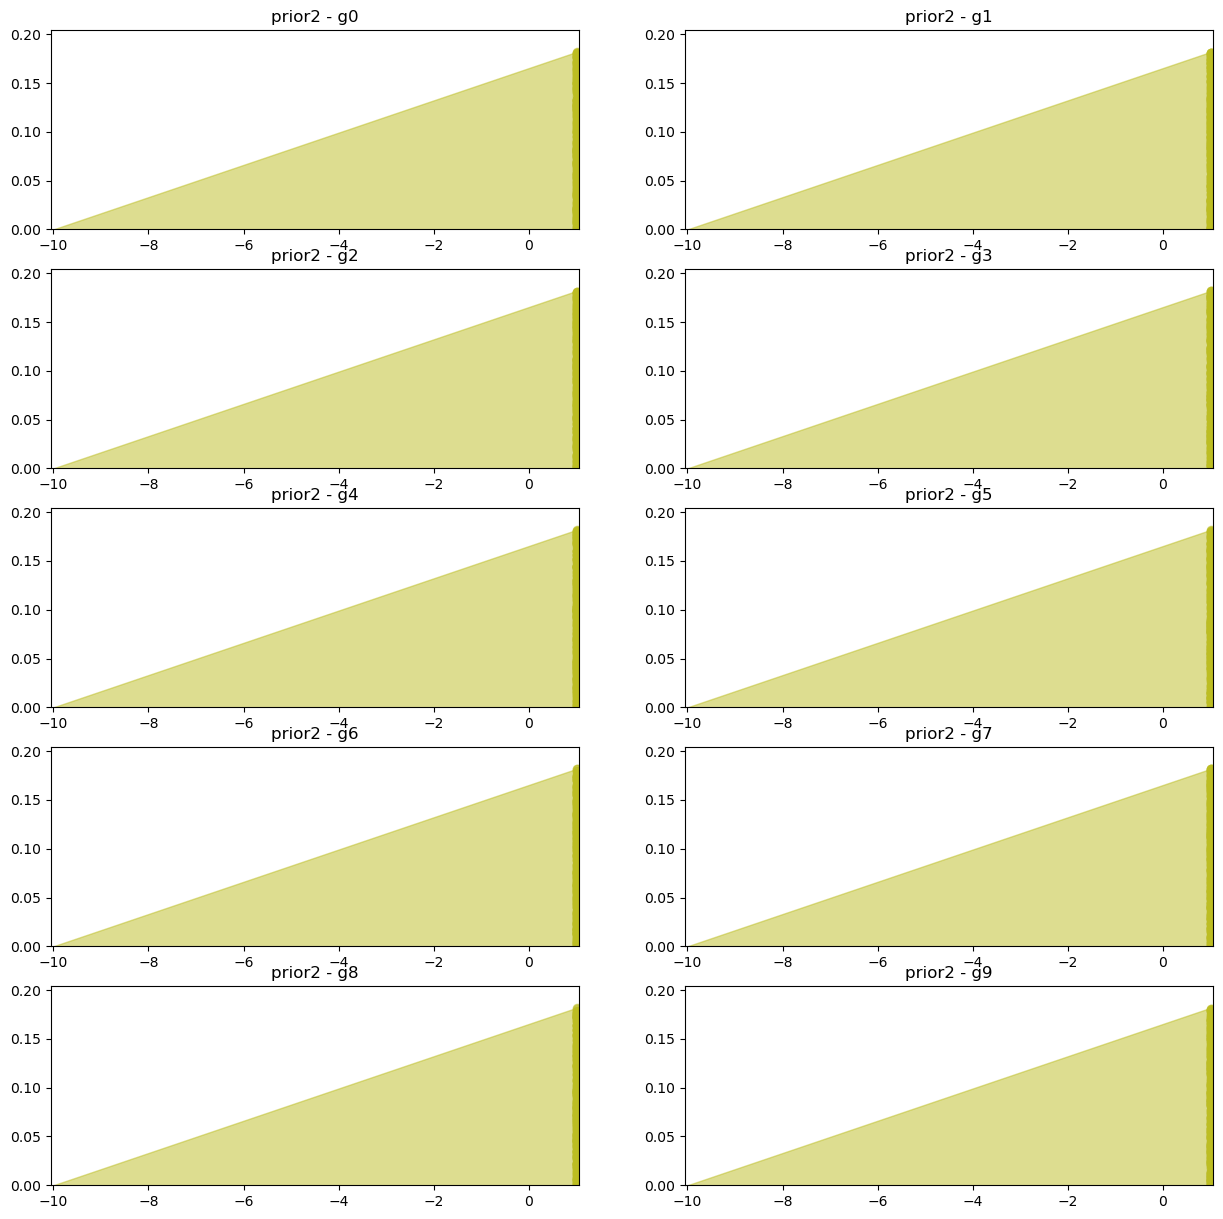

In [31]:
learning = tg.TgLearning(tgp, lr=0.1)
learning.execute_sgd(nitersSGD)
tgp.plot_priors(kde=False)

### SVGD

In [6]:
niters = 200 # number of iterations
nreview = 20 # number of review
rprior= 0
rgroup = 0

In [7]:
review_dict = learning.review(niters=niters, nreview=nreview, nprior=npriors, ngroup=ngroups) 
# hay alguna forma que salga las iteraciones totales en vez de 10 en 10 ?
tgp.plot_priors(kde=False)

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

# CDF de rprior rgroup 

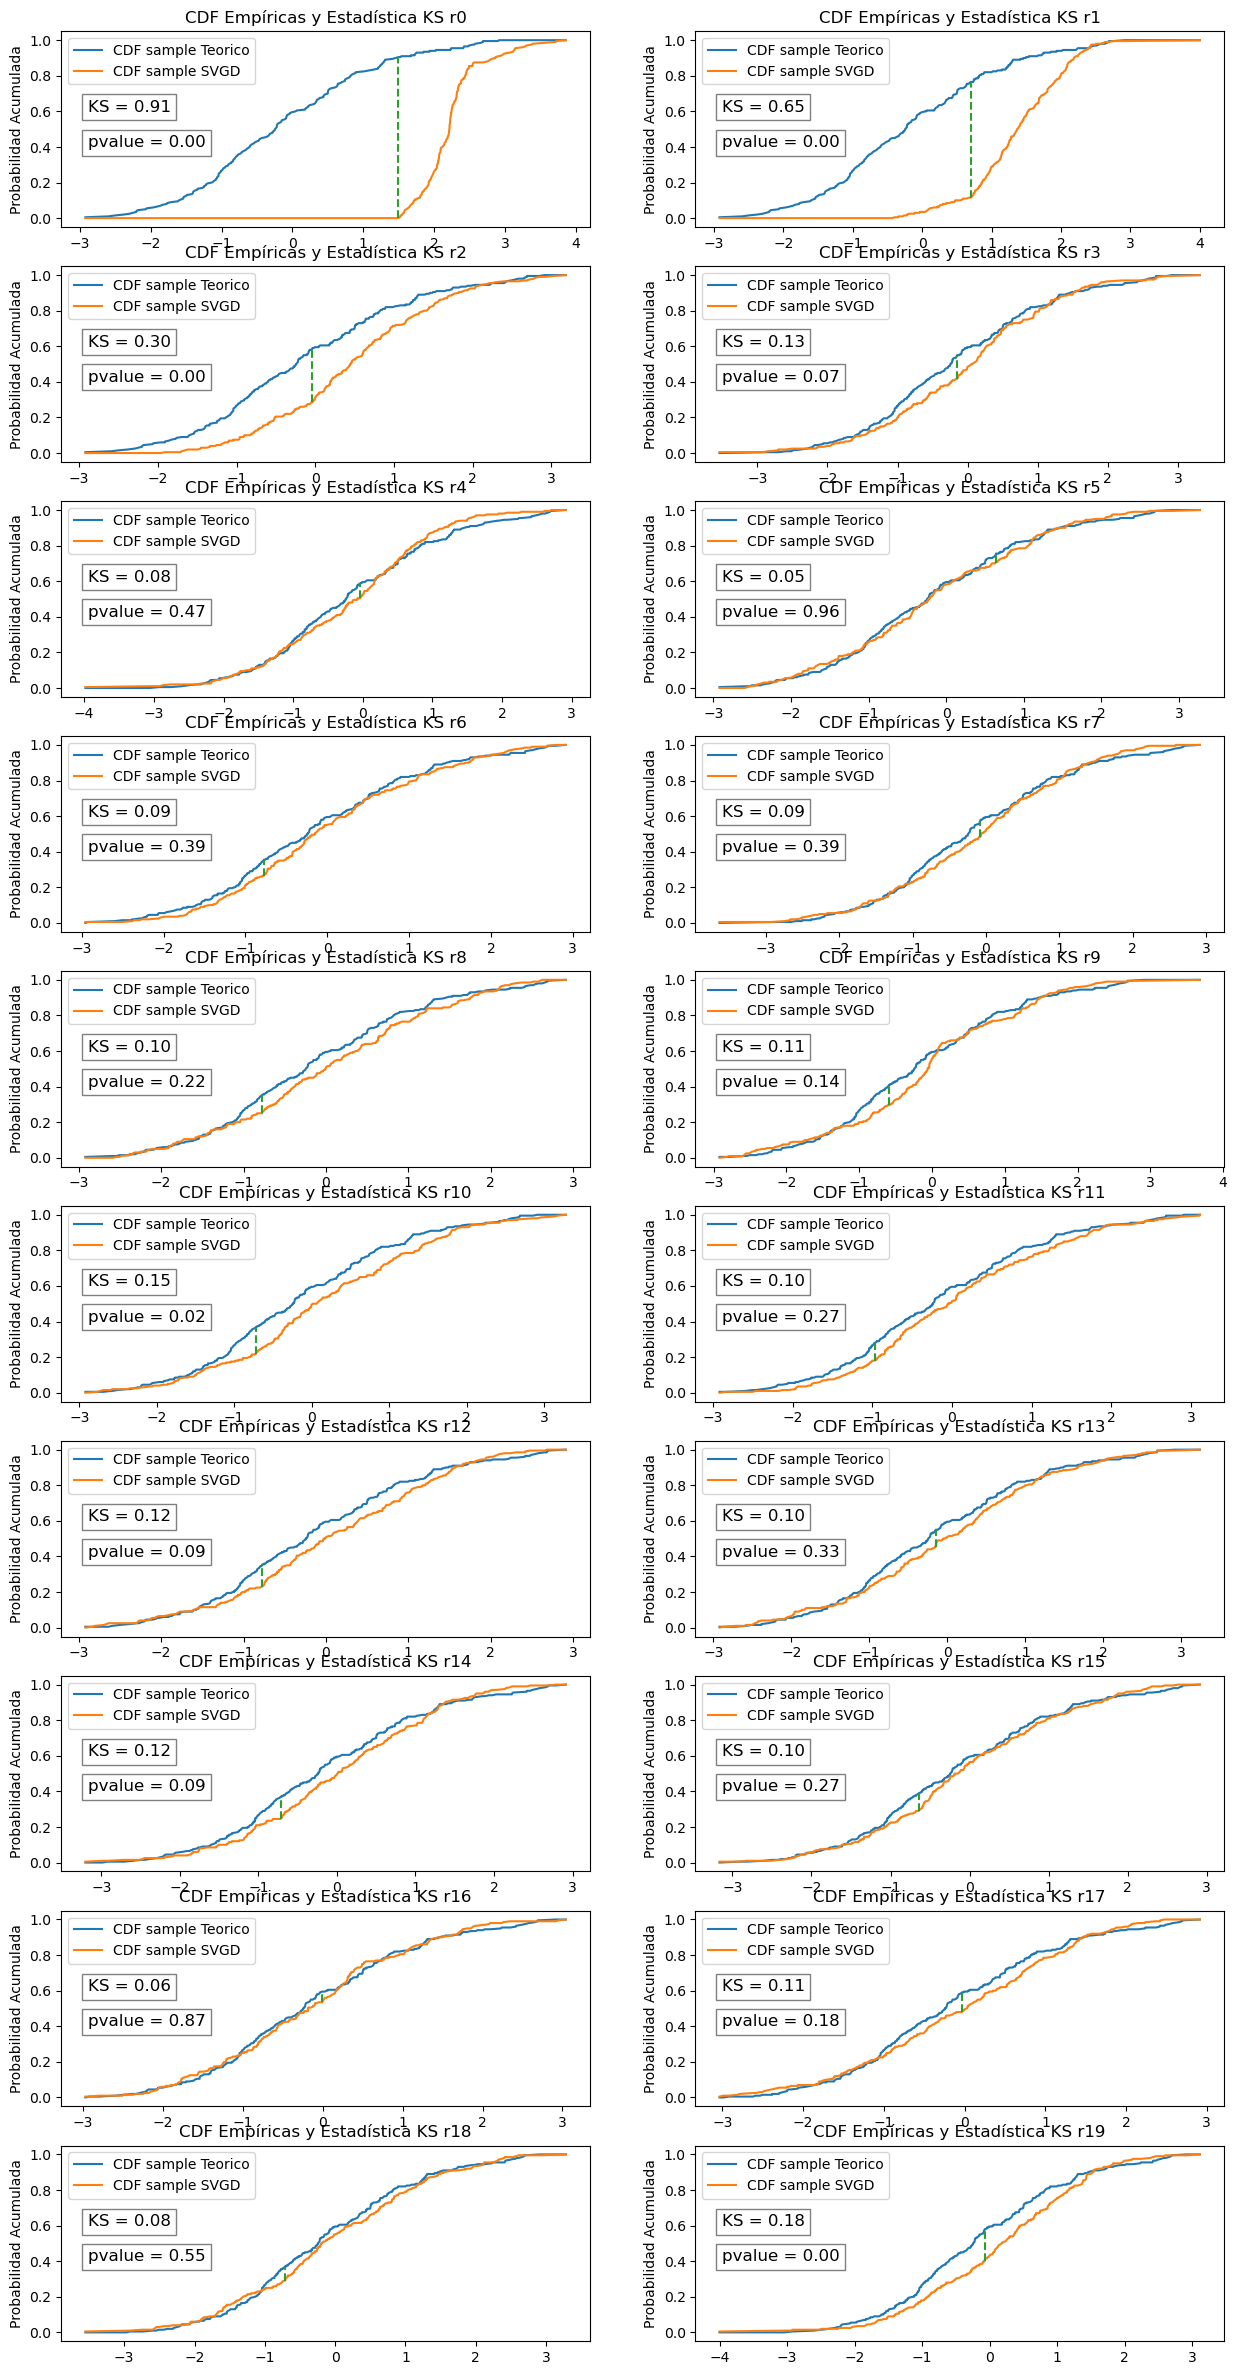

In [8]:
learning.plotKSCDF(theorical=sample_theo, review_dict=review_dict, rprior=rprior, rgroup=rgroup)

# Priors distribution 

## Distribution of each nparams

In [9]:
KS = []
KS_params = {}
nparams_list = [50, 100, 200, 300, 400, 500]
npriors = 4
for nparams in nparams_list:

    prior0 = tg.TgPrior('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=5, beta=5) # simetrico
    prior1 = tg.TgPrior('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
    prior2 = tg.TgPrior('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-10, high=1, alpha=2, beta=1) # masa a la derecha
    prior3 = tg.TgPrior('prior3', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-4, high=4, alpha=0.5, beta=0.5) # doble masa

    if npriors == 1: 
        k = tg.DummyKernel(prior0)
    elif npriors == 2:
        k = tg.DummyKernel(prior0, prior1)
    elif npriors == 3:
        k = tg.DummyKernel(prior0, prior1, prior2) 
    else:
        k = tg.DummyKernel(prior0, prior1, prior2, prior3) 


    cov = tg.CovarianceTransport(k, noise=None)
    tgp = tg.TGP([cov], dt=None, annealing=0)
    
    KS_dict = {}
    for prior in range(npriors):
        KS = []
        for n in range(100): 
            tgp.sample_priors()
            sample_theo0 = tgp.get_priors(npriors=npriors, ngroups=ngroups)

            tgp.sample_priors()
            sample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)
            sample0 = sample_theo0['prior{}'.format(prior), 'g0']
            sample = sample_theo['prior{}'.format(prior), 'g0']
            KS += [stats.kstest(sample0, sample, N=len(sample0)).statistic]
        KS_dict['prior{}'.format(prior)] = KS
    KS_params['params{}'.format(nparams)] = KS_dict    


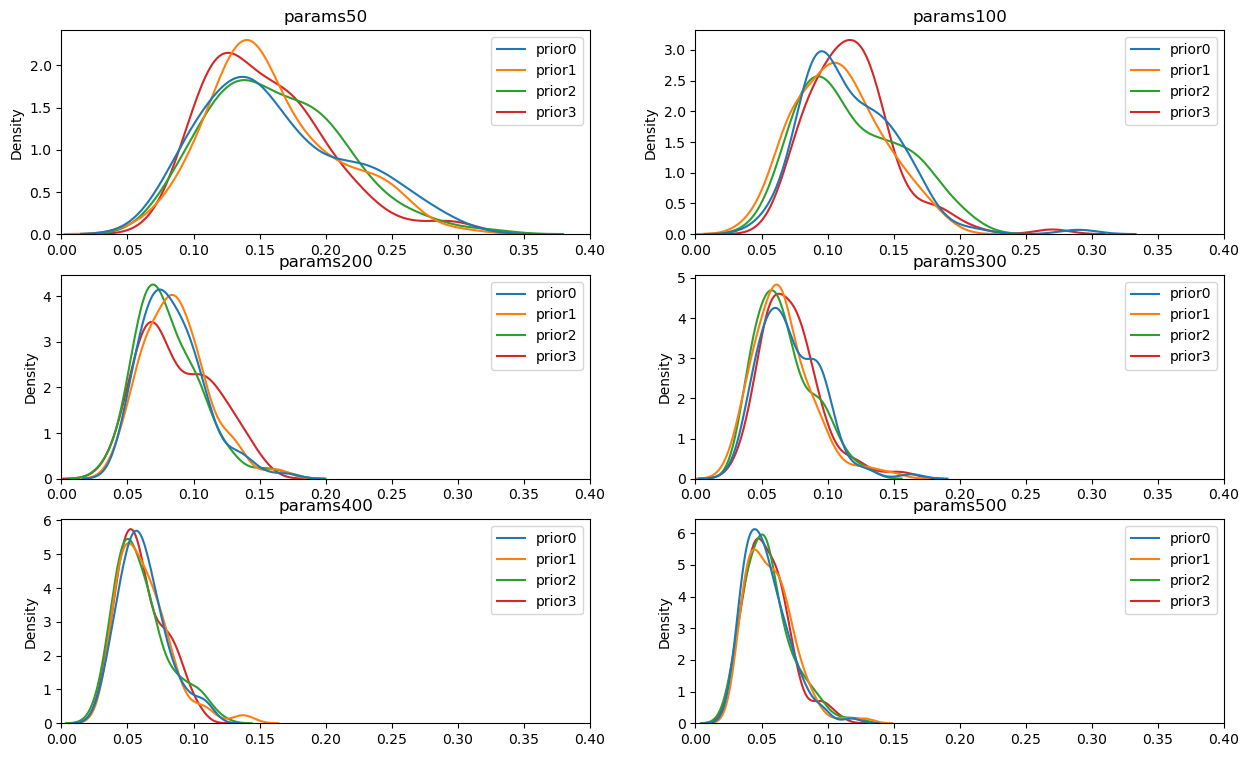

In [10]:
nrows = int(np.ceil(len(nparams_list) / 2))
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 3 * nrows), squeeze=False)

for i, params in enumerate(nparams_list):
    df = pd.DataFrame(KS_params['params{}'.format(params)])
    mean = df.mean()
    sb.kdeplot(data = df, ax = ax[i // 2, i % 2],  )
    ax[i // 2, i % 2].set_title('params{}'.format(params))
    ax[i // 2, i % 2].set_xlim([0, 0.4])

## Distribution of each prior

In [11]:
nparams_list = [50, 100, 200, 300, 400, 500]
KS_dict ={}
for prior in range(npriors):
    KS_params = {}
    for nparams in nparams_list:
        # Crear priors de nparams
        prior0 = tg.TgPrior('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-4, high=4, alpha=5, beta=5) # simetrico
        prior1 = tg.TgPrior('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                           low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
        prior2 = tg.TgPrior('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                           low=-10, high=1, alpha=2, beta=1) # masa a la derecha
        prior3 = tg.TgPrior('prior3', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                           low=-4, high=4, alpha=0.5, beta=0.5) # doble masa

        #loc= low, scale= high - low
        if npriors == 1: 
            k = tg.DummyKernel(prior0)
        elif npriors == 2:
            k = tg.DummyKernel(prior0, prior1)
        elif npriors == 3:
            k = tg.DummyKernel(prior0, prior1, prior2) 
        else:
            k = tg.DummyKernel(prior0, prior1, prior2, prior3) 


        cov = tg.CovarianceTransport(k, noise=None)
        tgp = tg.TGP([cov], dt=None, annealing=0)
        KS = []
        for n in range(100): 
            tgp.sample_priors()
            sample_theo0 = tgp.get_priors(npriors=npriors, ngroups=ngroups)

            tgp.sample_priors()
            sample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)
            sample0 = sample_theo0['prior{}'.format(prior), 'g0']
            sample = sample_theo['prior{}'.format(prior), 'g0']
            KS += [stats.kstest(sample0, sample, N=len(sample0)).statistic]
                
        KS_params['params{}'.format(nparams)] = KS
    KS_dict['prior{}'.format(prior)] = KS_params

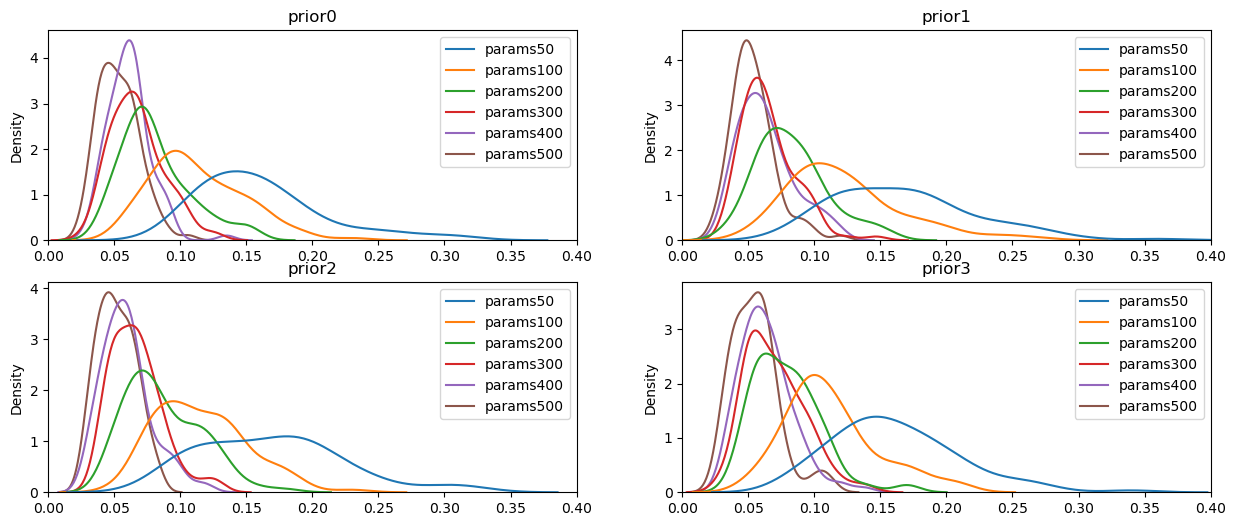

In [12]:
nrows = int(np.ceil(npriors / 2))
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 3 * nrows), squeeze=False)
for i in range(npriors):
    df = pd.DataFrame(KS_dict['prior{}'.format(i)])
    mean2 = df.mean()
    sb.kdeplot(data = df, ax = ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title('prior{}'.format(i))
    ax[i // 2, i % 2].set_xlim([0, 0.4])

# Evolution of KS in the training

## Evolution by params

In [13]:
nreview = 100

In [ ]:
learning_dict = {}
learning_params = {}
nparams_list = [50, 100, 200, 300, 400, 500]
npriors = 3 
for nparams in nparams_list:
    
    #Generar los priors
    prior0 = tg.TgPrior('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=5, beta=5) # simetrico
    prior1 = tg.TgPrior('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
    prior2 = tg.TgPrior('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-10, high=1, alpha=2, beta=1) # masa a la derecha
    prior3 = tg.TgPrior('prior3', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-4, high=4, alpha=0.5, beta=0.5) # doble masa


    if npriors == 1: 
        k = tg.DummyKernel(prior0)
    elif npriors == 2:
        k = tg.DummyKernel(prior0, prior1)
    elif npriors == 3:
        k = tg.DummyKernel(prior0, prior1, prior2) 
    else:
        k = tg.DummyKernel(prior0, prior1, prior2, prior3) 


    cov = tg.CovarianceTransport(k, noise=None)
    tgp = tg.TGP([cov], dt=None, annealing=0)
    
    tgp.sample_priors()
    sample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)
    # moda
    learning = tg.TgLearning(tgp, lr=0.1)
    learning.execute_sgd(nitersSGD)
    learning_dict = {}
    for rprior in range(npriors):
        # Guardar los datos de la grafica
        review_dict = learning.review(niters=niters, nreview=nreview, nprior=npriors, ngroup=ngroups) 
        #learning_data.append(learning.plotKSEvolution(theorical=sample_theo, review_dict=review_dict, rprior=rprior, rgroup=rgroup, showplot=False))
        learning_dict['prior{}'.format(rprior)] = learning.plotKSEvolution(theorical=sample_theo, review_dict=review_dict, rprior=rprior, rgroup=rgroup, showplot=False)
    learning_params['params{}'.format(nparams)] = learning_dict

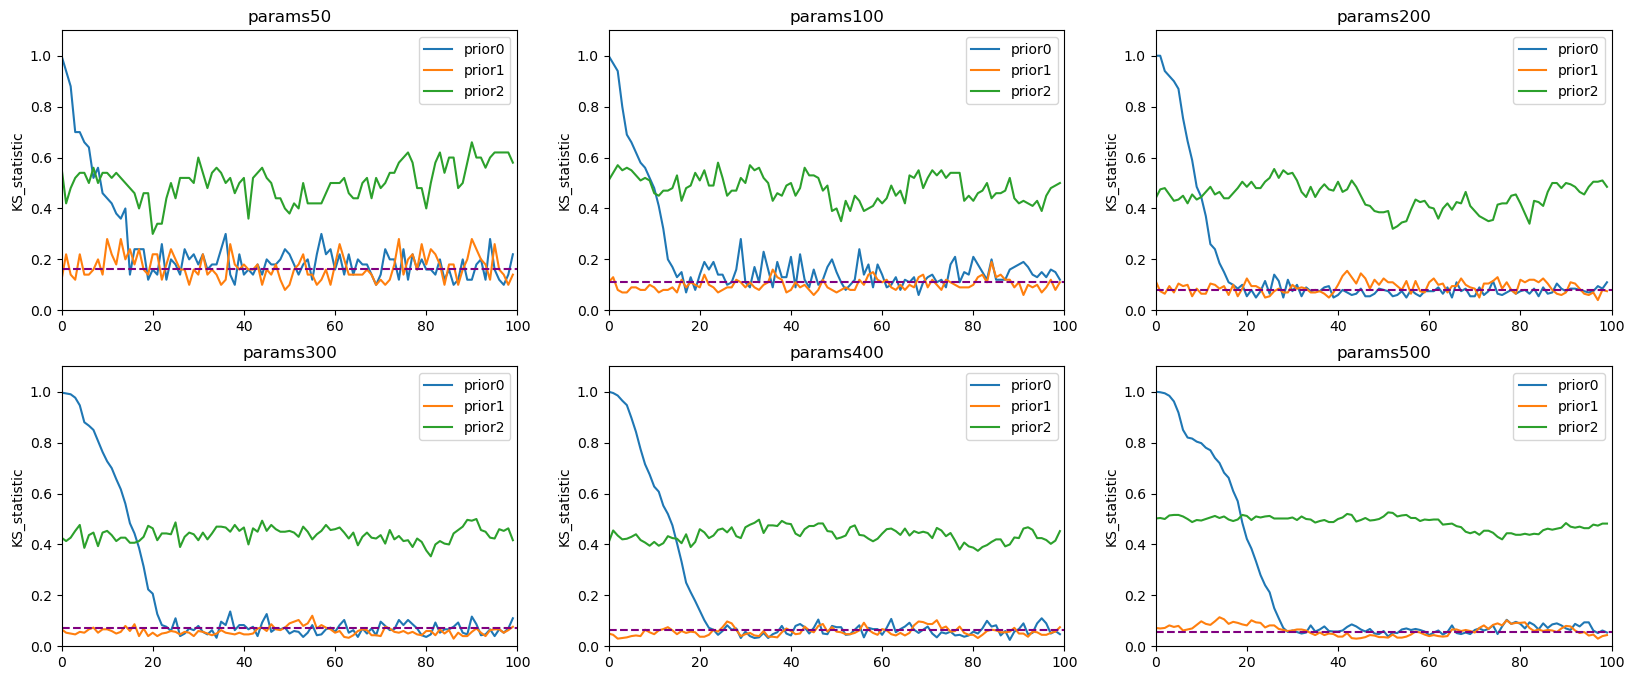

In [15]:
nrows = int(np.ceil(len(nparams_list) / 3))
fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, 4 * nrows), squeeze=False)

for i, params in enumerate(nparams_list):
    df = pd.DataFrame(learning_params['params{}'.format(params)])
    axi = ax[i // 3, i % 3]
    axi.plot(df)
    axi.set_title('params{}'.format(params))
    axi.axhline(mean2['params{}'.format(params)], color='purple', linestyle='dashed')
    axi.set_ylabel('KS_statistic')
    axi.set_ylim([0, 1.1])
    axi.set_xlim([0, nreview])
    axi.legend(['prior0', 'prior1', 'prior2'])

## Evolution of rprior rgroup

In [ ]:
learning_dict = {}
KS_dict = {}
nparams_list = [50, 100, 200, 300, 400, 500]
npriors = 3
for nparams in nparams_list:
    
    #Generar los priors
    prior0 = tg.TgPrior('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=5, beta=5) # simetrico
    prior1 = tg.TgPrior('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
    prior2 = tg.TgPrior('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-10, high=1, alpha=2, beta=1) # masa a la derecha
    prior3 = tg.TgPrior('prior3', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-4, high=4, alpha=0.5, beta=0.5) # doble masa

    #loc= low, scale= high - low
    if npriors == 1: 
        k = tg.DummyKernel(prior0)
    elif npriors == 2:
        k = tg.DummyKernel(prior0, prior1)
    elif npriors == 3:
        k = tg.DummyKernel(prior0, prior1, prior2) 
    else:
        k = tg.DummyKernel(prior0, prior1, prior2, prior3) 


    cov = tg.CovarianceTransport(k, noise=None)
    tgp = tg.TGP([cov], dt=None, annealing=0)
    
    tgp.sample_priors()
    sample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)
    
    # moda
    learning = tg.TgLearning(tgp, lr=0.1)
    learning.execute_sgd(nitersSGD)
    
    # Guardar los datos de la grafica
    review_dict = learning.review(niters=niters, nreview=nreview, nprior=npriors, ngroup=ngroups) 
    for rprior in range(npriors):
        for rgroup in range(ngroups):
            KS_dict[('params{}'.format(nparams), 'prior{}'.format(rprior), 'g{}'.format(rgroup))] = learning.plotKSEvolution(theorical=sample_theo,
                                                                                                                             review_dict=review_dict, rprior=rprior, rgroup=rgroup, showplot=False)

In [23]:
rprior = 1
rgroup = 0

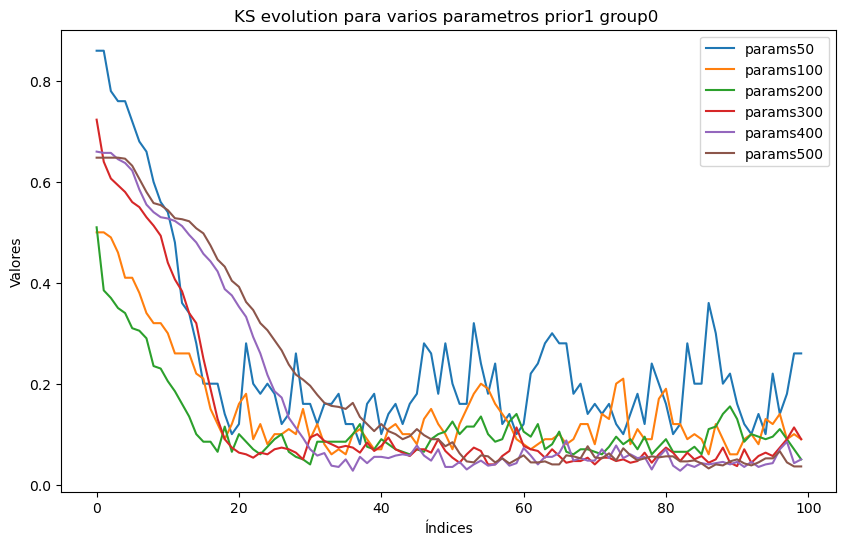

In [24]:
plt.figure(figsize=(10, 6))
legend = []
for params in nparams_list:
    L = 'params{}'.format(params)
    legend.append(L)
    plt.plot(range(nreview), KS_dict['params{}'.format(params), 'prior{}'.format(rprior),'g{}'.format(rgroup)])
plt.xlabel('Índices')
plt.ylabel('Valores')
plt.title('KS evolution para varios parametros '+ 'prior{} '.format(rprior) + 'group{} '.format(rgroup))
plt.legend(legend)
plt.show()